<a href="https://colab.research.google.com/github/chelynl/Machine_Learning/blob/main/08_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes
- nonlinear classification model (separates nonlinearly distributed data)
- assumes variables are independent and equally important for prediction ("naive")
- based on Bayes theorem
- we can run into problems when certain attributes do not occur for certain levels of the outcome (predicted probabilities become 0 regardless of other attributes) --> solution is `Laplace Correction`

## Bayes Theorem
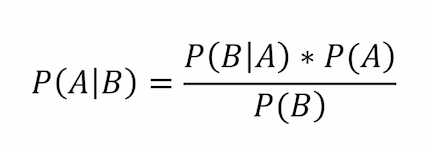

## Advantages
- intuitive, simple to explain and implement
- can produce very good predictions
- especially powerful with categorical variables and text
- relatively fast computation time
- robust to noise and irrelevant attributes

## Disadvantages
- assumption (equally important and independent variables) is often faulty
- most easily applied wth categorical or normally distributed variables
 - software assumes normality so be careful!
 - transform/bin data if inputs are not normally distributed
- requires more storage than other models (entire training set is your model)
 - slightly less storage than KNN
- more variables = mopre problems
 - more variables (including levels of categoricals) = larger dataset required to make reliable estimates of each conditional probability)
- cannot use interactions between vars (due to independence)
- estimated probabilities are less trustworthy than predicted classes

In [10]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/chelynl/ML_notes/main/classification/Social_Network_Ads.csv?token=AMGO4MF4OERGOW2E3H5MV3TAY6KOG')

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
# Define target and inputs
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
# Feature scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
# Train model and get predictions
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

In [11]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 7, 25]])

In [12]:
# Accuracy
accuracy_score(y_test, y_pred)

0.9

Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


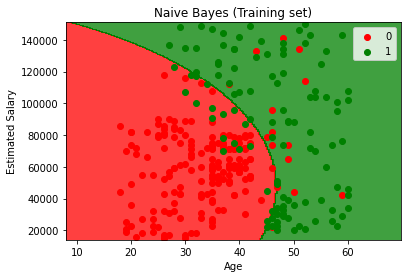

In [13]:
# Training set
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, nb.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


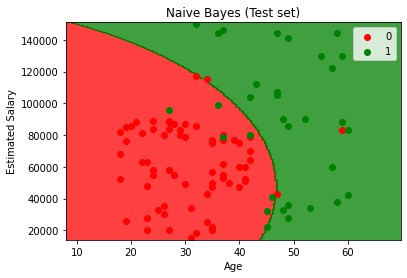

In [14]:
# Testing set
X_set, y_set = ss.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, nb.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()